In [138]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

*Загружаем изображение*

In [139]:
img = cv2.imread("sar_1.jpg")
if img is None:
    raise FileNotFoundError("Файл не найден.")

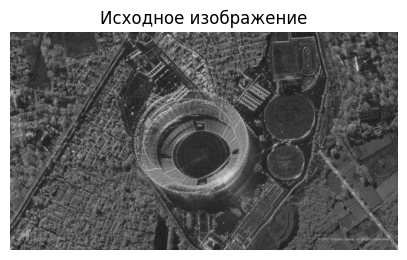

In [140]:
img = cv2.imread("sar_1.jpg", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0

plt.figure(figsize = (5,5))
plt.imshow(img, cmap = 'gray')
plt.title("Исходное изображение")
plt.axis('off')
plt.show()


*Описываем функции шумов*

In [141]:
# Шум Гаусса
def add_gaussian_noise(image, mean = 0, sigma = 0.25):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy = np.clip(image + noise, 0, 1)
    return noisy

# Постоянный шум
def add_uniform_noise(image, intensity = 0.25):
    noise = np.random.uniform(-intensity, intensity, image.shape)
    noisy = np.clip(image + noise, 0, 1)
    return noisy

*Добавляем картинке шум*

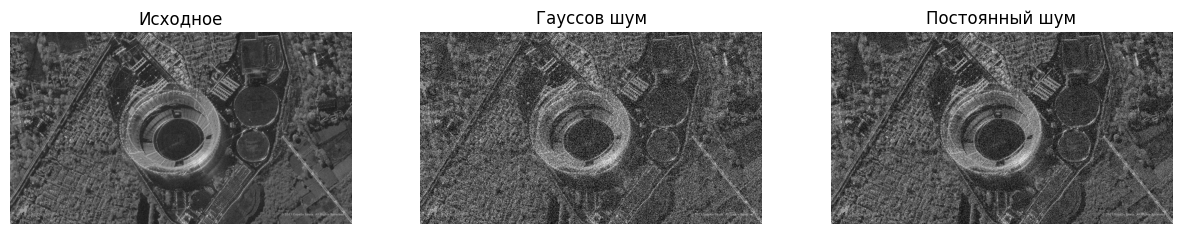

In [142]:
noisy_gauss = add_gaussian_noise(img)
noisy_uniform = add_uniform_noise(img)

plt.figure(figsize = (15,4))

plt.subplot(1,3,1);
plt.imshow(img, cmap = 'gray');
plt.title("Исходное");
plt.axis('off')

plt.subplot(1,3,2);
plt.imshow(noisy_gauss, cmap = 'gray');
plt.title("Гауссов шум");
plt.axis('off')

plt.subplot(1,3,3);
plt.imshow(noisy_uniform, cmap = 'gray');
plt.title("Постоянный шум");
plt.axis('off')

plt.show()

In [143]:
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

def calc_metrics(original, filtered):
    return mse(original, filtered), ssim(original, filtered, data_range=1.0)

*Описываем функции удалени шума*

In [144]:
def apply_filters(noisy):
    results = {}

    # Медианный фильтр
    median_filtered = cv2.medianBlur((noisy * 255).astype(np.uint8), 3).astype(np.float32) / 255.0
    results["Медианный"] = median_filtered

    # Гауссов фильтр
    gaussian_filtered = cv2.GaussianBlur(noisy, (3,3), 0)
    results["Гауссов"] = gaussian_filtered

    # Билатериальный фильтр
    bilateral_filtered = cv2.bilateralFilter((noisy * 255).astype(np.uint8), 9, 75, 75).astype(np.float32) / 255.0
    results["Билатериальный"] = bilateral_filtered

    # Фильтр нелокальных средних
    nlm_filtered = cv2.fastNlMeansDenoising((noisy * 255).astype(np.uint8), None, h = 10, templateWindowSize = 7, searchWindowSize = 21)
    nlm_filtered = nlm_filtered.astype(np.float32) / 255.0
    results["Нелокальных средних"] = nlm_filtered

    return results

*Удаляем шум*


=== Гауссов шум ===

Медианный: MSE = 0.011836, SSIM = 0.351210
Гауссов: MSE = 0.008459, SSIM = 0.434410
Билатериальный: MSE = 0.011561, SSIM = 0.334362
Нелокальных средних: MSE = 0.049075, SSIM = 0.166609




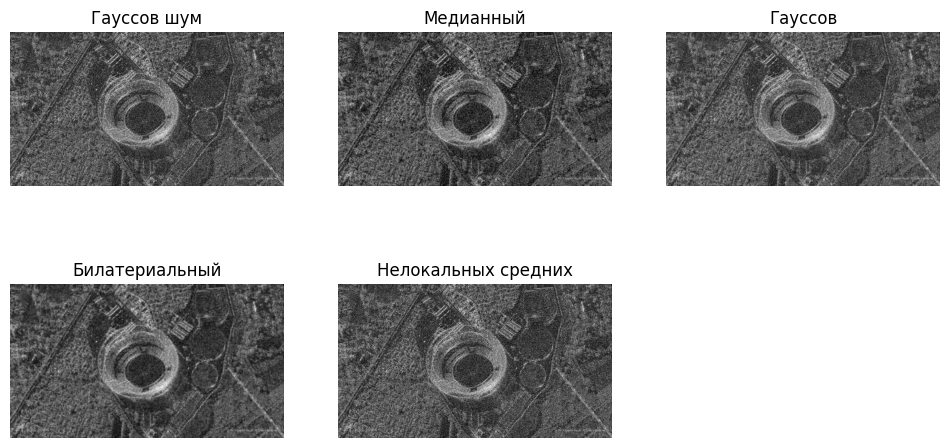

In [145]:
noisy_img = noisy_gauss

print(f"\n=== Гауссов шум ===\n")
filtered_results = apply_filters(noisy_img)

for name, fimg in filtered_results.items():
    m, s = calc_metrics(img, fimg)
    print(f"{name}: MSE = {m:.6f}, SSIM = {s:.6f}")

plt.figure(figsize=(12,6))
plt.subplot(2,3,1);
plt.imshow(noisy_img, cmap = 'gray');
plt.title("Гауссов шум");
plt.axis('off');

print(f"\n");

for i, (name, fimg) in enumerate(filtered_results.items(), 2):
    plt.subplot(2,3,i)
    plt.imshow(fimg, cmap = 'gray')
    plt.title(name)
    plt.axis('off')
plt.show()


=== Гауссов шум ===

Медианный: MSE = 0.006931, SSIM = 0.459779
Гауссов: MSE = 0.003850, SSIM = 0.611934
Билатериальный: MSE = 0.003898, SSIM = 0.565475
Нелокальных средних: MSE = 0.020111, SSIM = 0.319620




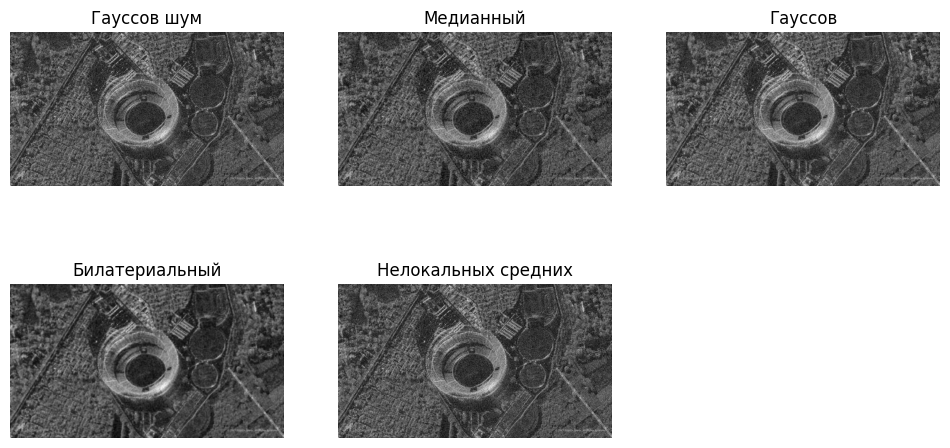

In [146]:
noisy_img = noisy_uniform

print(f"\n=== Постоянный шум ===\n")
filtered_results = apply_filters(noisy_img)

for name, fimg in filtered_results.items():
    m, s = calc_metrics(img, fimg)
    print(f"{name}: MSE = {m:.6f}, SSIM = {s:.6f}")

plt.figure(figsize=(12,6))
plt.subplot(2,3,1);
plt.imshow(noisy_img, cmap = 'gray');
plt.title("Постоянный шум");
plt.axis('off');

print(f"\n");

for i, (name, fimg) in enumerate(filtered_results.items(), 2):
    plt.subplot(2,3,i)
    plt.imshow(fimg, cmap = 'gray')
    plt.title(name)
    plt.axis('off')
plt.show()